# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: año de las muestras
* month: número del mes del año para la medición
* day: día del año de la medición
* week: día de la semana como carácter
* temp_2: máxima temperatura en los dos días anteriores
* temp_1: máxima temperatura el día anterior
* average: promedio histórico
* actual: temperatura máxima recogida
* friend: predicción de un amigo, 20 por encima y debajo de la temperatura promedio (no es muy buen amigo)


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
df = pd.read_csv("./data/temps.csv")          
df


,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47
344,2016,12,28,Wed,42,47,45.3,48,58
345,2016,12,29,Thurs,47,48,45.3,48,65
346,2016,12,30,Fri,48,48,45.4,57,42


### 2. Realiza un análisis exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [4]:
df.describe(include="all")

,year,month,day,week,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348,348.000000,348.000000,348.000000,348.000000,348.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Tues,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN
mean,2016.0,6.477011,15.514368,NaN,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,NaN,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,NaN,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,NaN,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,NaN,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,NaN,71.000000,71.000000,69.025000,71.000000,71.000000


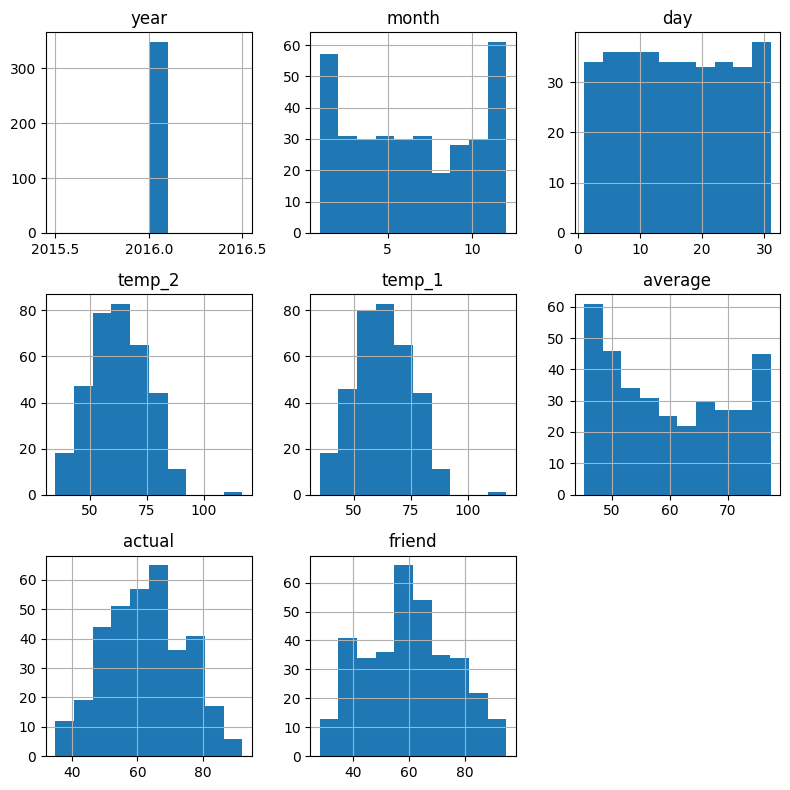

In [5]:
df.hist(figsize=(8, 8))
plt.tight_layout()
plt.show()

In [6]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(['year'], axis=1)
print("Correlation:", numeric_df.corr(method='pearson'))

Correlation:             month       day    temp_2    temp_1   average    actual    friend
month    1.000000 -0.000412  0.047651  0.032664  0.120806  0.004529  0.048145
day     -0.000412  1.000000 -0.046194 -0.000691 -0.021136 -0.021675  0.024592
temp_2   0.047651 -0.046194  1.000000  0.857800  0.821560  0.805835  0.583758
temp_1   0.032664 -0.000691  0.857800  1.000000  0.819328  0.877880  0.541282
average  0.120806 -0.021136  0.821560  0.819328  1.000000  0.848365  0.689278
actual   0.004529 -0.021675  0.805835  0.877880  0.848365  1.000000  0.569145
friend   0.048145  0.024592  0.583758  0.541282  0.689278  0.569145  1.000000


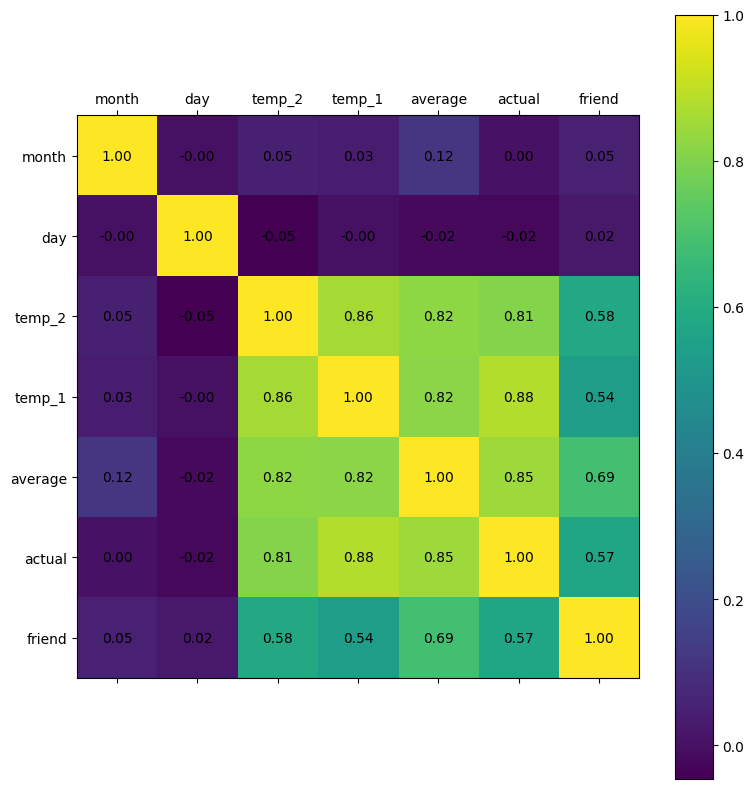

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

corr_matrix = numeric_df.corr(method='pearson')

cax = ax.matshow(corr_matrix)

fig.colorbar(cax)

ticks = np.arange(len(numeric_df.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_df.columns)
ax.set_yticklabels(numeric_df.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()

plt.show()

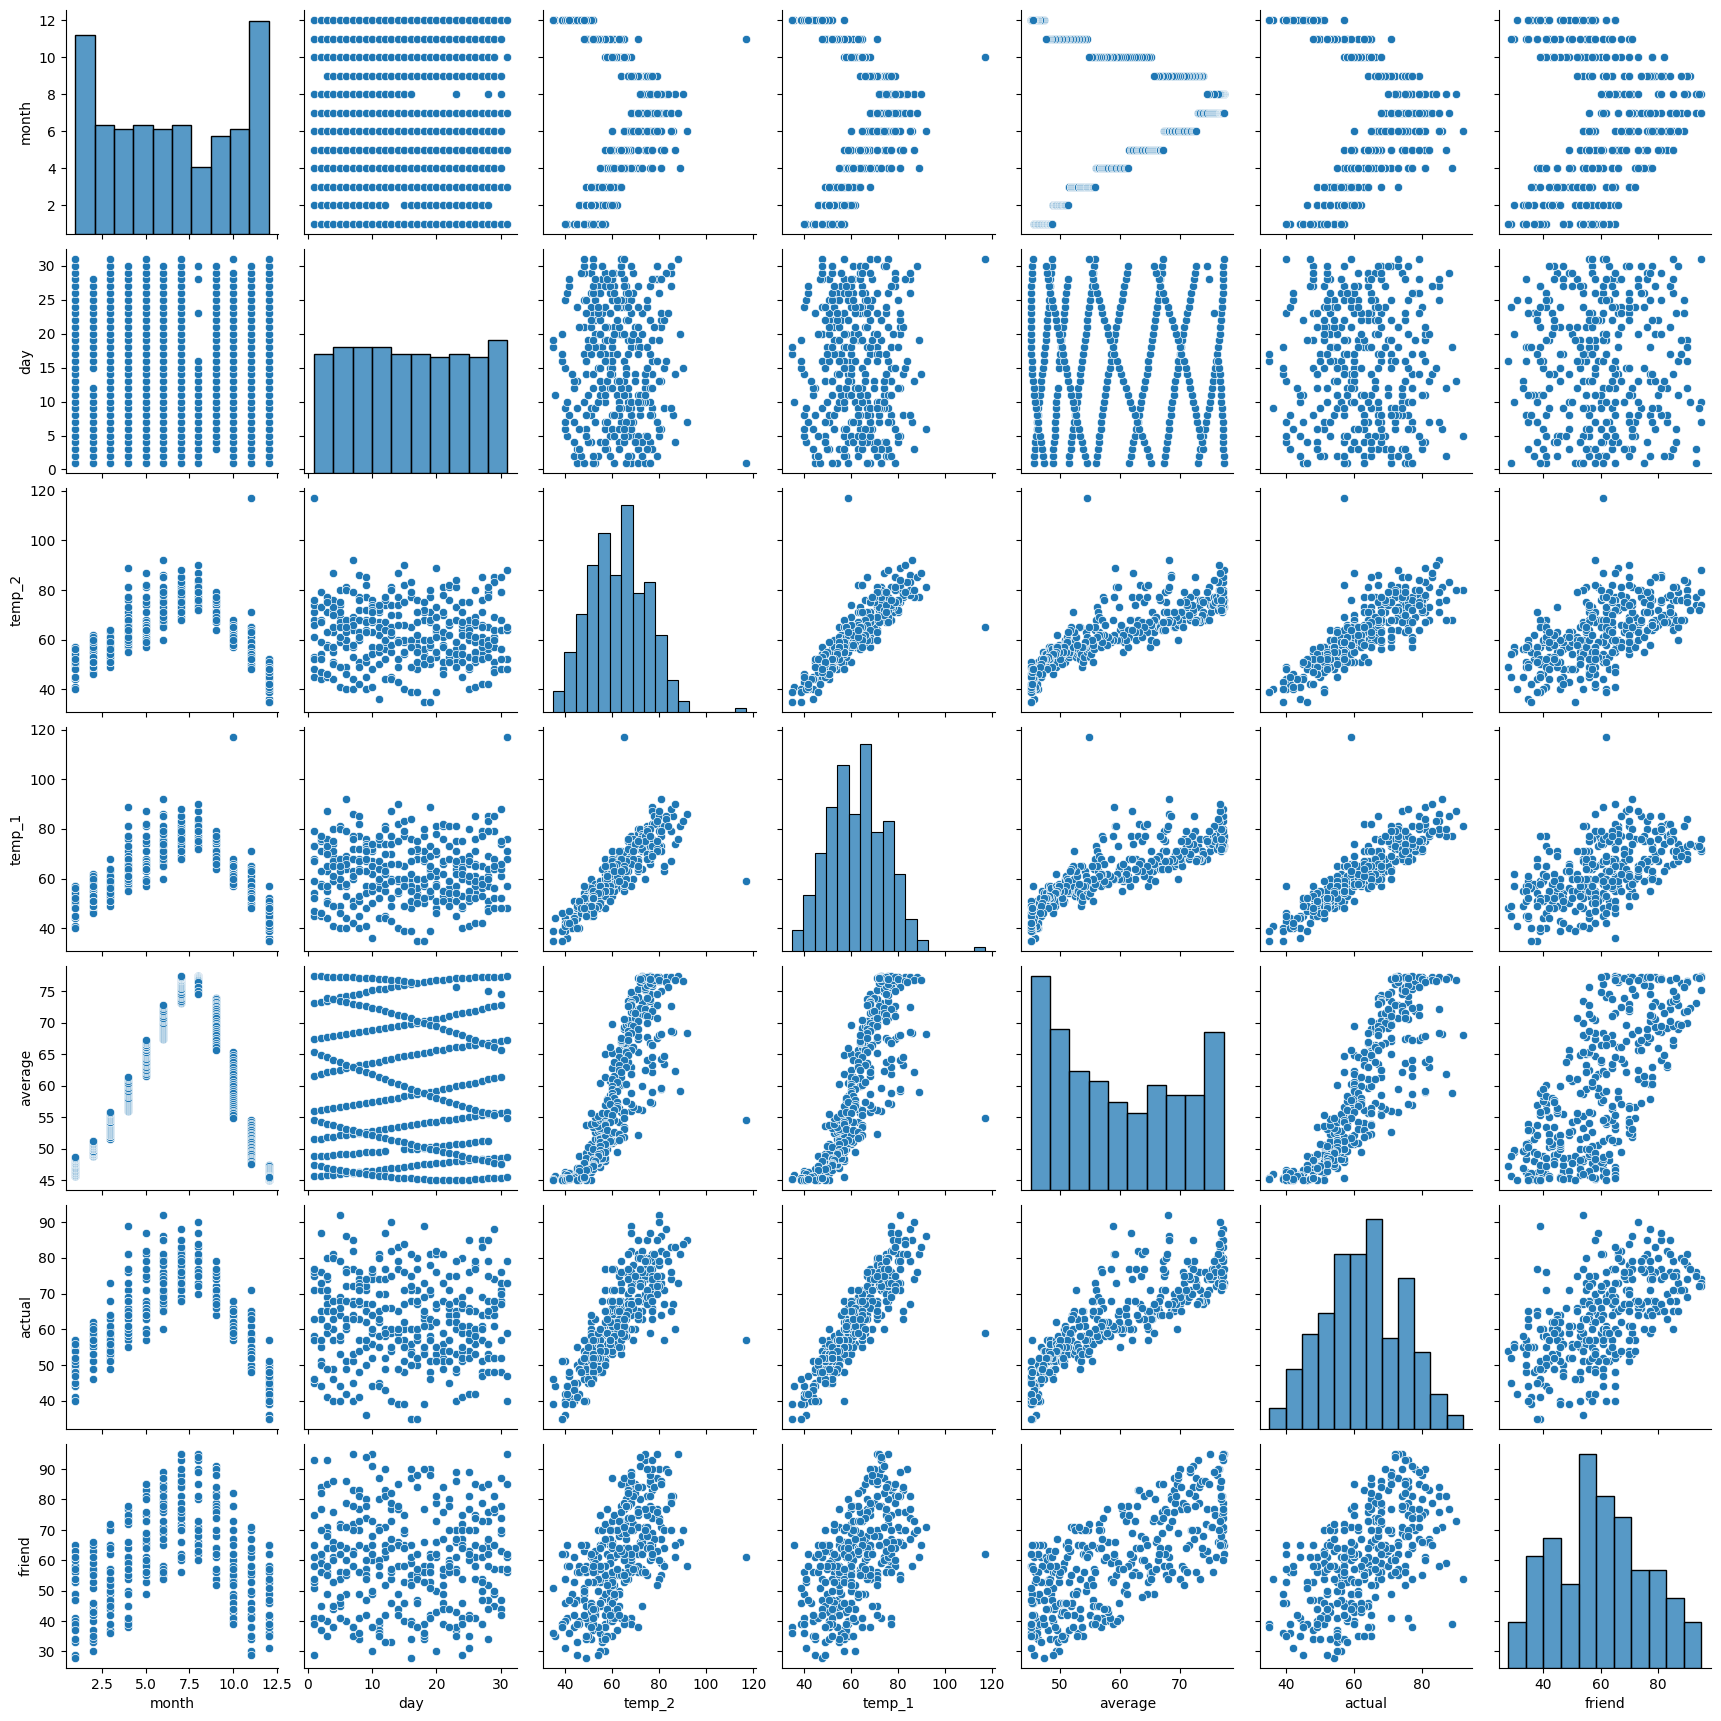

In [8]:
sns.pairplot(numeric_df)

### 3. Realiza la ingeniería de características

Necesitamos que todos los datos sean numéricos.

In [9]:
df = pd.get_dummies(df, columns=['week'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        348 non-null    int64  
 1   month       348 non-null    int64  
 2   day         348 non-null    int64  
 3   temp_2      348 non-null    int64  
 4   temp_1      348 non-null    int64  
 5   average     348 non-null    float64
 6   actual      348 non-null    int64  
 7   friend      348 non-null    int64  
 8   week_Fri    348 non-null    bool   
 9   week_Mon    348 non-null    bool   
 10  week_Sat    348 non-null    bool   
 11  week_Sun    348 non-null    bool   
 12  week_Thurs  348 non-null    bool   
 13  week_Tues   348 non-null    bool   
 14  week_Wed    348 non-null    bool   
dtypes: bool(7), float64(1), int64(7)
memory usage: 24.3 KB


In [11]:
df.describe(include="all")

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348,348,348,348,348,348,348
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298,299,298,299,299,296,299
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


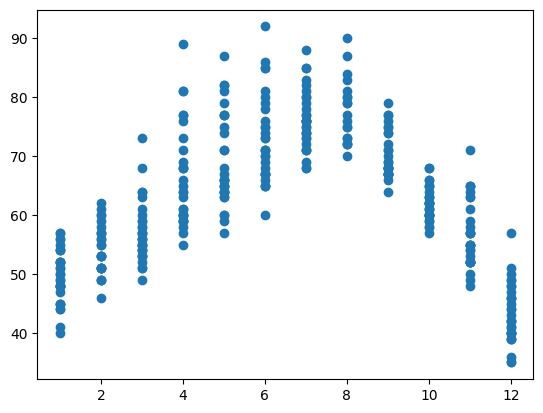

In [12]:
plt.scatter(df['month'], df['actual']);

### 4. Divide en datos de entrenamiento (train) y evaluación (test)

In [13]:
X = df.drop('actual', axis=1)
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(278, 14) (70, 14) (278,) (70,)


### 5. Entrena el modelo

Juega con los parámetros para ver qué ajuste obtienes.

In [15]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


DecisionTreeRegressor(max_depth=3, random_state=42)

### 6. Evaluación de tu modelo

Calcula las métricas vistas para variable continua (MAE, MAPE, MSE, RMSE)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Predecir con el primer modelo
y_pred1 = tree_reg1.predict(X_test)

# Calcular y mostrar métricas para el primer modelo
print("Modelo 1:")
print("MAE:  ", mean_absolute_error(y_test, y_pred1))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred1))
print("MSE:  ", mean_squared_error(y_test, y_pred1))
print("R2:   ", r2_score(y_test, y_pred1))

# Predecir con el segundo modelo
y_pred2 = tree_reg2.predict(X_test)

# Calcular y mostrar métricas para el segundo modelo
print("\nModelo 2:")
print("MAE:  ", mean_absolute_error(y_test, y_pred2))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred2))
print("MSE:  ", mean_squared_error(y_test, y_pred2))
print("R2:   ", r2_score(y_test, y_pred2))

Modelo 1:
MAE:   4.348301765150505
MAPE:  0.06875783225934934
MSE:   30.009959678244858
R2:    0.7853753336183346

Modelo 2:
MAE:   3.786136932354919
MAPE:  0.0606838404247514
MSE:   20.608463875247654
R2:    0.852612774849209


### 7. Representa el árbol de decisión

[Text(0.5, 0.8333333333333334, 'average <= 55.55\nsquared_error = 138.702\nsamples = 348\nvalue = 62.543'),
 Text(0.25, 0.5, 'average <= 46.85\nsquared_error = 48.006\nsamples = 148\nvalue = 51.98'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 23.044\nsamples = 40\nvalue = 43.825'),
 Text(0.375, 0.16666666666666666, 'squared_error = 23.5\nsamples = 108\nvalue = 55.0'),
 Text(0.75, 0.5, 'temp_1 <= 67.5\nsquared_error = 62.14\nsamples = 200\nvalue = 70.36'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 18.03\nsamples = 81\nvalue = 63.914'),
 Text(0.875, 0.16666666666666666, 'squared_error = 44.626\nsamples = 119\nvalue = 74.748')]

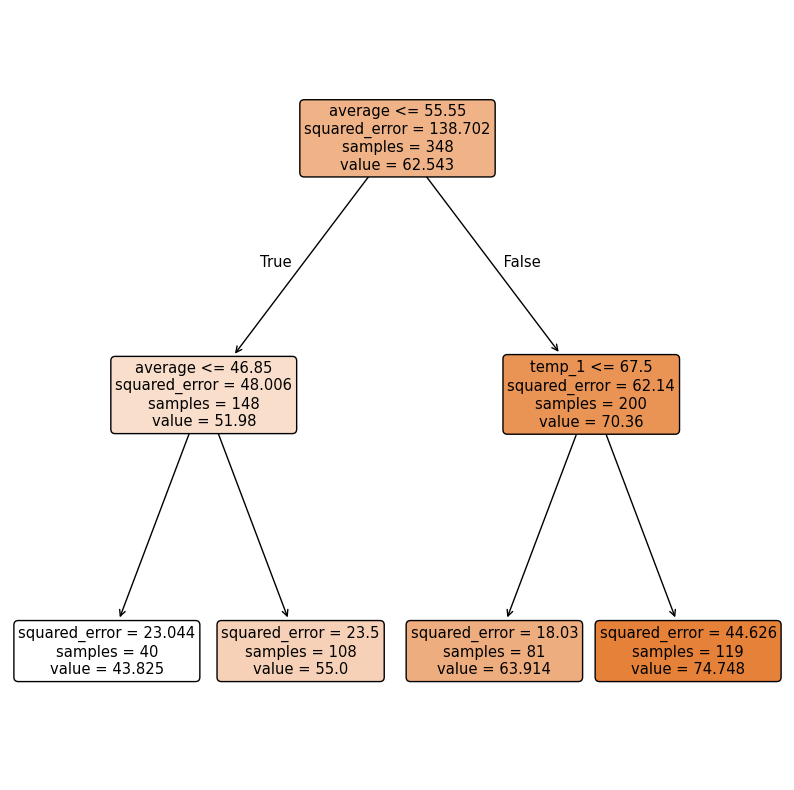

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))

plot_tree(tree_reg1, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns, 
          max_depth=2)


[Text(0.5, 0.875, 'actual <= 55.55\nsquared_error = 138.702\nsamples = 348\nvalue = 62.543'),
 Text(0.25, 0.625, 'actual <= 46.85\nsquared_error = 48.006\nsamples = 148\nvalue = 51.98'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'average <= 43.5\nsquared_error = 23.044\nsamples = 40\nvalue = 43.825'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'average <= 56.5\nsquared_error = 23.5\nsamples = 108\nvalue = 55.0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'average <= 67.5\nsquared_error = 62.14\nsamples = 200\nvalue = 70.36'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'actual <= 62.15\nsquared_error = 18.03\nsamples = 81\nvalue = 63.914'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'average <= 76.5\nsquared_error = 44.626\nsamples = 119\nvalue = 74.748'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 

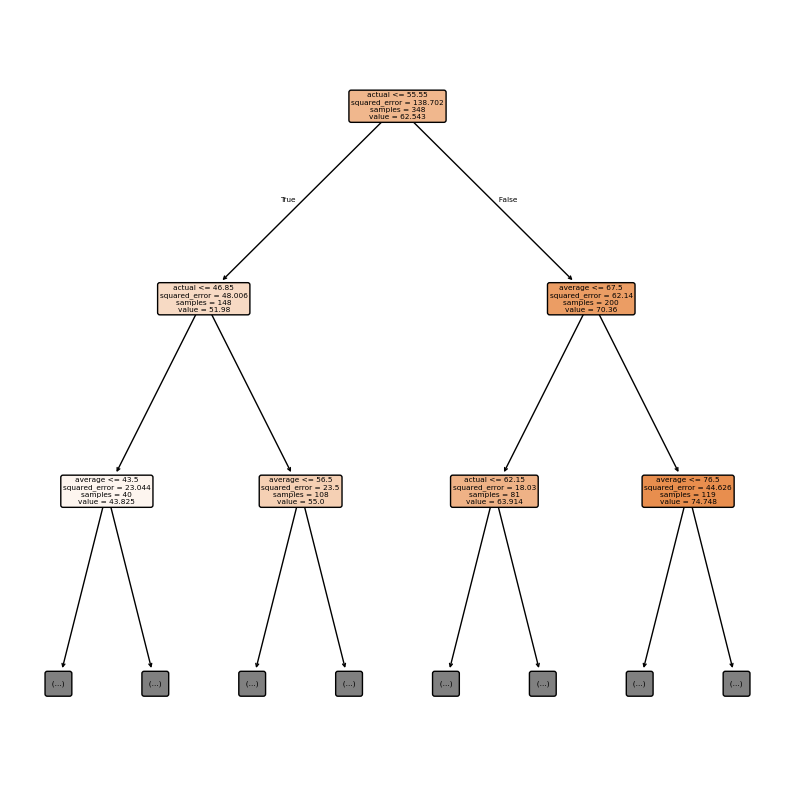

In [31]:

from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))

plot_tree(tree_reg2, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns, 
          max_depth=2)



### 8. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

# Definir los rangos de los hiperparámetros que se desean probar
parameters = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, None],  # Ejemplos de profundidades máximas
    "min_samples_leaf": [1, 2, 4, 6, 8, 10, 11, 12, 13, 14, 16, 18, 20]  # Ejemplos de números mínimos de muestras por hoja
}

# Configurar el GridSearchCV
dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

# Ajustar el modelo a los datos de entrenamiento
dtr_gs.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", dtr_gs.best_params_)
print("Mejor puntuación de validación cruzada:", -dtr_gs.best_score_)

Mejores hiperparámetros encontrados: {'max_depth': 6, 'min_samples_leaf': 13}
Mejor puntuación de validación cruzada: 4.0497770048038575


In [20]:
# Presenta los mejores parámetros encontrados y su puntuación (deberás inspeccionar la instancia)

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = dtr_gs.best_estimator_

# Obtener los mejores parámetros encontrados por GridSearchCV
best_params = dtr_gs.best_params_

# Obtener la mejor puntuación de validación cruzada
best_score = dtr_gs.best_score_

# Mostrar el mejor modelo
print("Mejor estimador encontrado por GridSearchCV:", best_model)

# Mostrar los mejores parámetros y su puntuación
print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación de validación cruzada (neg_mean_absolute_error):", best_score)
print("Mejor puntuación de validación cruzada (mean_absolute_error):", -best_score)



Mejor estimador encontrado por GridSearchCV: DecisionTreeRegressor(max_depth=6, min_samples_leaf=13)
Mejores parámetros encontrados: {'max_depth': 6, 'min_samples_leaf': 13}
Mejor puntuación de validación cruzada (neg_mean_absolute_error): -4.0497770048038575
Mejor puntuación de validación cruzada (mean_absolute_error): 4.0497770048038575


In [21]:
# Obtén el mejor estimador de la instancia
# Obtener el mejor estimador de la instancia GridSearchCV
best_model = dtr_gs.best_estimator_

# Mostrar el mejor modelo
print("Mejor estimador encontrado por GridSearchCV:", best_model)


Mejor estimador encontrado por GridSearchCV: DecisionTreeRegressor(max_depth=6, min_samples_leaf=13)


### 9. Obten el `feature_importances`

In [22]:
# Obtén la puntuación de validación de la instancia
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = dtr_gs.best_estimator_

# Obtener las importancias de las características
feature_importances = best_model.feature_importances_


In [23]:
# Asumiendo que tienes una lista con los nombres de las características
feature_names = X_train.columns  # o una lista con los nombres

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)


       Feature  Importance
4       temp_1    0.867687
5      average    0.129653
6       friend    0.002102
2          day    0.000558
0         year    0.000000
1        month    0.000000
3       temp_2    0.000000
7     week_Fri    0.000000
8     week_Mon    0.000000
9     week_Sat    0.000000
10    week_Sun    0.000000
11  week_Thurs    0.000000
12   week_Tues    0.000000
13    week_Wed    0.000000


### 10. Construye un nuevo modelo `DecisionTreeClassifier` 

Queremos un modelo que clasifique cuando en un día va a hacer una temperatura mayor a 65ºF. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [33]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Supongamos que tus datos están en un DataFrame llamado df con una columna 'temperature'
# y otras características en las columnas correspondientes

# Crear una variable objetivo binaria
df['target'] = np.where(df['temp_1'] > 65, 1, 0)

# Separar las características y la variable objetivo
X = df.drop(columns=['temp_1', 'target'])
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# Definir el modelo
model = DecisionTreeClassifier()

# Definir los rangos de los hiperparámetros que se desean probar
parameters = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")


In [35]:
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Mostrar los mejores parámetros y su puntuación
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada (accuracy):", grid_search.best_score_)


Mejores parámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor puntuación de validación cruzada (accuracy): 0.9029220779220779


In [36]:
# Predecir con el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8714285714285714
Precision: 0.7419354838709677
Recall: 0.9583333333333334
F1 Score: 0.8363636363636363
